In [1]:
import numpy as np
import common.analysis_helper as helper

# cmjtqh6tv5jg008enck0

In [2]:
job_id = 'cmjtqh6tv5jg008enck0'
attack_qubit_indices = (0, 1, 2, 4, 6)
delays = [160, 320, 640, 1280, 2560, 5120]
shots = 8000

In [3]:
result = helper.get_results_from_zip('./experiment_1/results/', job_id)

In [4]:
counts = result.get_counts()

In [5]:
m1counts = [helper.get_1_mcounts_per_qubit(qubit_index, counts) for qubit_index in range(len(attack_qubit_indices))]

In [6]:
def split_per_experiment(mcounts):
    n = len(delays)
    blank_victim_circ_z, blank_victim_circ_x, victim_qc_with_cnot_z, victim_qc_with_cnot_x = [mcounts[i: (i+n)] for i in range(0, len(mcounts), n)]
    return blank_victim_circ_z, blank_victim_circ_x, victim_qc_with_cnot_z, victim_qc_with_cnot_x

In [7]:
diff_percent_xs = []
diff_percent_zs = []

for qubit_index, qubit in enumerate(attack_qubit_indices):
    blank_victim_circ_z, blank_victim_circ_x, victim_qc_with_cnot_z, victim_qc_with_cnot_x = split_per_experiment(m1counts[qubit_index])
    blank_percent_z = np.array(blank_victim_circ_z) / shots * 100
    blank_percent_x = np.array(blank_victim_circ_x) / shots * 100
    victim_qc_cnot_z = np.array(victim_qc_with_cnot_z) / shots * 100
    victim_qc_cnot_x = np.array(victim_qc_with_cnot_x) / shots * 100
    diff_percent_x = victim_qc_cnot_x - blank_percent_x
    diff_percent_z = victim_qc_cnot_z - blank_percent_z
    diff_percent_xs.append(diff_percent_x)
    diff_percent_zs.append(diff_percent_z)

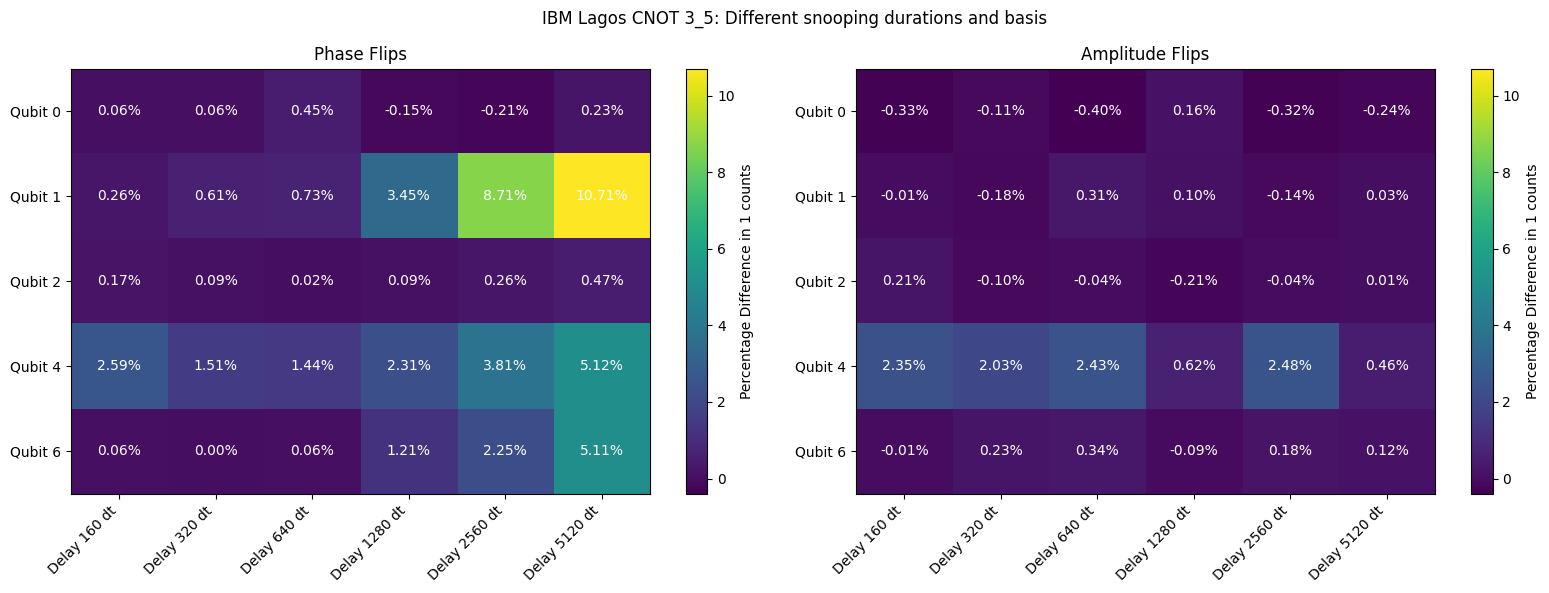

In [8]:
fig, ax = helper.exp_1_diff_heatmap(attack_qubit_indices, delays, diff_percent_xs, diff_percent_zs, '3_5')

# cn08d34p1am0008q3xd0

In [9]:
job_id = 'cn08d34p1am0008q3xd0'
attack_qubit_indices = (0, 2, 4, 5, 6)
delays = [160, 320, 640, 1280, 2560]
shots = 8000

In [10]:
result = helper.get_results_from_zip('./experiment_1/results/', job_id)

In [11]:
counts = result.get_counts()

In [12]:
m1counts = [helper.get_1_mcounts_per_qubit(qubit_index, counts) for qubit_index in range(len(attack_qubit_indices))]

In [13]:
def split_per_experiment(mcounts):
    n = len(delays)
    blank_victim_circ_z, blank_victim_circ_x, victim_qc_with_cnot_z, victim_qc_with_cnot_x = [mcounts[i: (i+n)] for i in range(0, len(mcounts), n)]
    return blank_victim_circ_z, blank_victim_circ_x, victim_qc_with_cnot_z, victim_qc_with_cnot_x

In [14]:
diff_percent_xs = []
diff_percent_zs = []

for qubit_index, qubit in enumerate(attack_qubit_indices):
    blank_victim_circ_z, blank_victim_circ_x, victim_qc_with_cnot_z, victim_qc_with_cnot_x = split_per_experiment(m1counts[qubit_index])
    blank_percent_z = np.array(blank_victim_circ_z) / shots * 100
    blank_percent_x = np.array(blank_victim_circ_x) / shots * 100
    victim_qc_cnot_z = np.array(victim_qc_with_cnot_z) / shots * 100
    victim_qc_cnot_x = np.array(victim_qc_with_cnot_x) / shots * 100
    diff_percent_x = victim_qc_cnot_x - blank_percent_x
    diff_percent_z = victim_qc_cnot_z - blank_percent_z
    diff_percent_xs.append(diff_percent_x)
    diff_percent_zs.append(diff_percent_z)

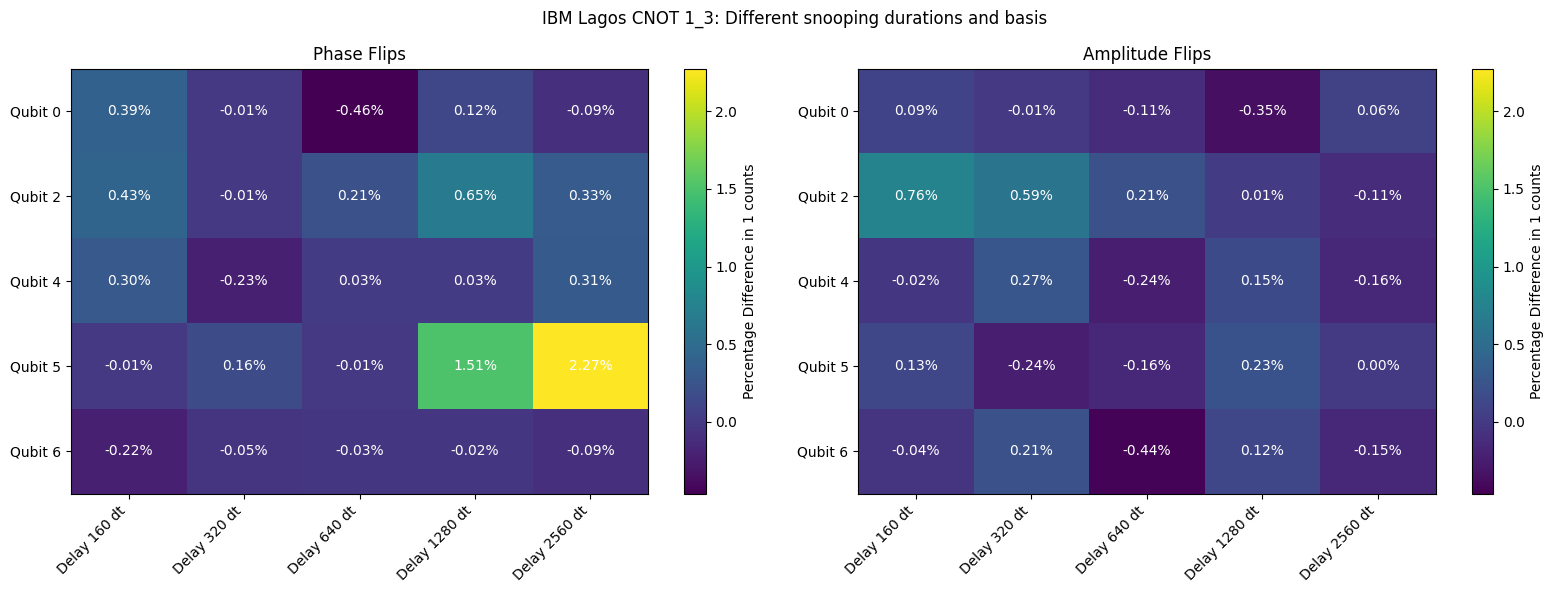

In [15]:
fig, ax = helper.exp_1_diff_heatmap(attack_qubit_indices, delays, diff_percent_xs, diff_percent_zs, '1_3')